In [1]:
%load_ext watermark
%watermark -a Chan -d -p numpy,pandas,konlpy,torch,keras

Using TensorFlow backend.


Chan 2019-08-27 

numpy 1.16.4
pandas 0.24.2
konlpy 0.5.1
torch 1.0.1
keras 2.2.4


In [2]:
import pandas as pd
import numpy as np
import konlpy
from utils.bp_processing import bp_tokenize

# Load datasets 

In [3]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from imblearn.under_sampling import RandomUnderSampler
import torch.utils.data as data_utils
import torch

In [4]:
human = pd.read_csv('../../data/train.csv', encoding='utf-16')[['comment', 'label']]
human.head()

,comment,label
0,ㅜㅜ,0
1,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,0
2,헐,0
3,제시,0
4,이거인 듯,0


In [5]:
human.groupby('label').count()

,comment
label,
0,39904
1,2096


label 1인거 37000개 더하자 

In [6]:
auto = pd.read_csv('../../data/auto_labeled.csv', encoding='utf-16', sep='\t')
auto.dropna(inplace=True)
auto.label = auto.label.astype('int')
auto.head()

,comment,label
0,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ자낳괴,1
1,ㅇ,0
2,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,0
3,실토하심ㅋㅋㅋㅋㅋㅋㅋ,0
4,돌려 돌려 돌림판~,0


In [7]:
auto.groupby('label').count()

,comment
label,
0,1938856
1,61137


In [8]:
new_dataset = pd.concat([human[['comment','label']], auto[['comment','label']][auto.label==1][:37000]])

In [9]:
new_dataset.groupby('label').count()

,comment
label,
0,39904
1,39096


In [10]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(new_dataset.comment, new_dataset.label)

In [11]:
y_train.sum(), len(y_train), y_test.sum(), len(y_test)

(29267, 59250, 9829, 19750)

In [12]:
import auto_label

In [14]:
rule = auto_label.auto_label(new_dataset, './word-fobidden.json')

In [20]:
from sklearn.metrics import classification_report, accuracy_score

In [21]:
print(classification_report(rule.label, rule.filtered))
print(accuracy_score(rule.label, rule.filtered))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82     39904
           1       0.97      0.56      0.71     39096

    accuracy                           0.78     79000
   macro avg       0.84      0.77      0.77     79000
weighted avg       0.83      0.78      0.77     79000

0.7766582278481012


In [22]:
from konlpy.tag import Okt

In [23]:
tmp = Okt()

C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [26]:
tmp.pos('씪빢'), tmp.pos('씨빠') 

([('씪빢', 'Noun')], [('씨빠', 'Noun')])

In [54]:
tmp.pos('앙기모띠 ㅋㅋㅋ 시1발')

[('앙', 'Adverb'),
 ('기', 'Modifier'),
 ('모', 'Modifier'),
 ('띠', 'Noun'),
 ('ㅋㅋㅋ', 'KoreanParticle'),
 ('시', 'Noun'),
 ('1', 'Number'),
 ('발', 'Noun')]

In [28]:
from utils import nKT

In [57]:
nKT.prep2(['씪빢', '씨빠'], '1')

2it [00:00, 133.40it/s]


([['씪빢'], ['씨빠']], ['1'])

In [56]:
nKT.prep2(['앙기모띠 ㅋㅋㅋ 시1발'], '1')[0]

1it [00:00, 33.35it/s]


[['앙기모띠', '시발']]

In [61]:
bp_tokenize(['씪빢', '씨빠'])

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


array([['236', '148', '170', '235', '185', '162'],
       ['236', '148', '168', '235', '185', '160']], dtype='<U3')

In [70]:
V

array([[236, 148, 170, 235, 185, 162],
       [236, 148, 168, 235, 185, 160],
       [227, 133, 134, 227, 133, 131]])

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

vocab = list("ㅆㅃㅅㅂ시바씨빠씨빨씨팔시빨씪빢씷빯")

V = bp_tokenize(vocab).astype('int')

df = pd.DataFrame(V, index=vocab, columns=['x', 'y','z'])
df.shape

100%|███████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 17958.49it/s]


(18, 3)

In [140]:
for i in df.iterrows():
    print(i)

('ㅆ', x    227
y    133
z    134
Name: ㅆ, dtype: int32)
('ㅃ', x    227
y    133
z    131
Name: ㅃ, dtype: int32)
('ㅅ', x    227
y    133
z    133
Name: ㅅ, dtype: int32)
('ㅂ', x    227
y    133
z    130
Name: ㅂ, dtype: int32)
('시', x    236
y    139
z    156
Name: 시, dtype: int32)
('바', x    235
y    176
z    148
Name: 바, dtype: int32)
('씨', x    236
y    148
z    168
Name: 씨, dtype: int32)
('빠', x    235
y    185
z    160
Name: 빠, dtype: int32)
('씨', x    236
y    148
z    168
Name: 씨, dtype: int32)
('빨', x    235
y    185
z    168
Name: 빨, dtype: int32)
('씨', x    236
y    148
z    168
Name: 씨, dtype: int32)
('팔', x    237
y    140
z    148
Name: 팔, dtype: int32)
('시', x    236
y    139
z    156
Name: 시, dtype: int32)
('빨', x    235
y    185
z    168
Name: 빨, dtype: int32)
('씪', x    236
y    148
z    170
Name: 씪, dtype: int32)
('빢', x    235
y    185
z    162
Name: 빢, dtype: int32)
('씷', x    236
y    148
z    183
Name: 씷, dtype: int32)
('빯', x    235
y    185
z    175
Name: 빯, dtype:

In [208]:
%matplotlib inline

In [222]:
import matplotlib

In [226]:
import matplotlib.font_manager as fm

font_location = 'C:\\Windows\\Fonts\\malgunsl.ttf'  
                    # ex - 'C:/asiahead4.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

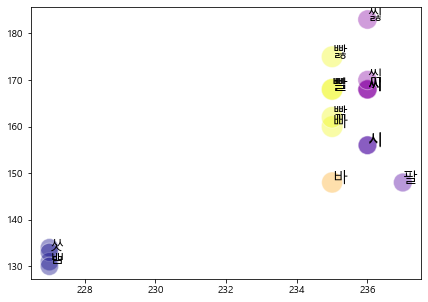

In [250]:

fig = plt.figure()
fig.set_size_inches(7, 5)
ax = plt.axes()
ax.scatter(x = df.x,
            y = df.z,
            s = df.y*2.5, # <== 😀 Look here!
           c=df.y,
           
            alpha=0.4, 
            edgecolors='w',
          cmap=cm.plasma);
for word, pos in df.iterrows():
    ax.annotate(word, (pos[0],pos[2]), fontsize=15)


In [251]:
fig.savefig('../bpe')